# **Exploratory Data Analysis**


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


Import the pandas module.


In [1]:
%pip install pandas 


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


Utilize the Pandas method read_csv() to load the data into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## Distribution


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Distribution curve for the column `ConvertedComp`.


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

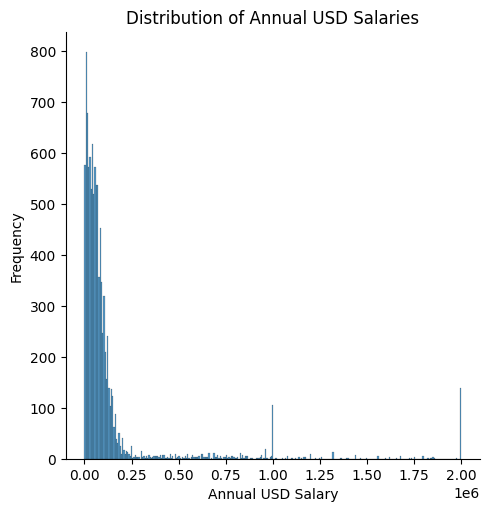

In [7]:
# distribution plot
sns.displot(df['ConvertedComp'])
plt.title('Distribution of Annual USD Salaries')
plt.xlabel('Annual USD Salary')
plt.ylabel('Frequency')
plt.show()

Histogram for the column `ConvertedComp`.


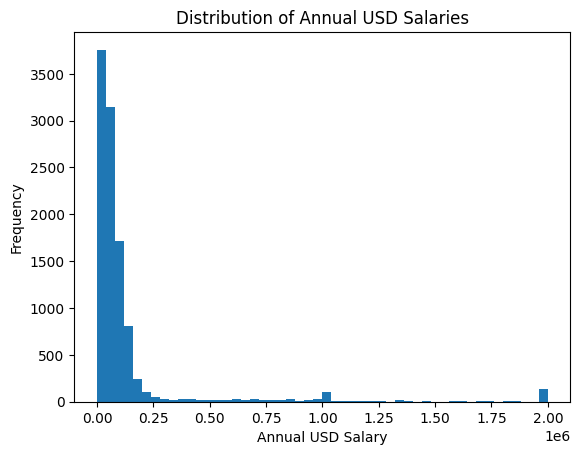

In [8]:
# To plot histogram
plt.hist(df['ConvertedComp'], bins=50)
plt.xlabel('Annual USD Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Annual USD Salaries')
plt.show()

Median of the column `ConvertedComp`


In [9]:

df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [10]:
men=(df['Gender']=='Man').sum()
print(men)

10480


Median of ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
woman = df.loc[df['Gender'] == "Woman", 'ConvertedComp']
woman.median()

57708.0

summary for the column `Age`?


In [12]:
summary = df['Age'].describe()
print(summary)


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


 Histogram of the column `Age`.


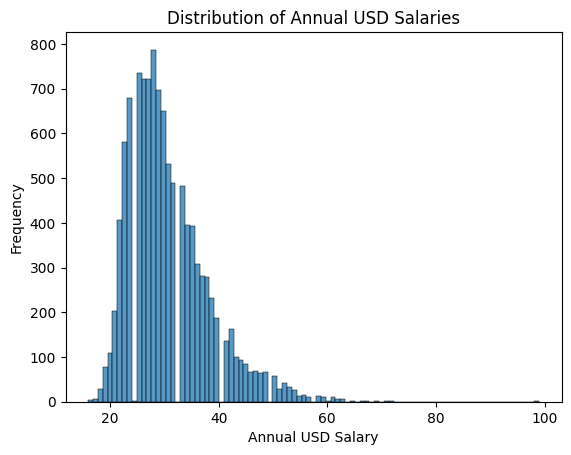

In [13]:
sns.histplot(df['Age'])
plt.title('Distribution of Annual USD Salaries')
plt.xlabel('Annual USD Salary')
plt.ylabel('Frequency')
plt.show()

Finding out if outliers exist in the column `ConvertedComp`, using a box plot?


<Axes: xlabel='ConvertedComp'>

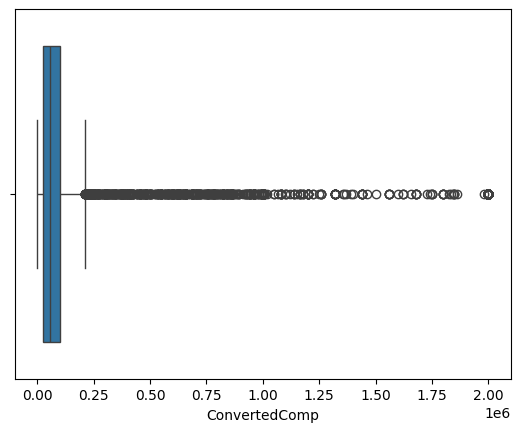

In [14]:
#Box plot 
sns.boxplot(x='ConvertedComp', data=df)

Inter Quartile Range for the column `ConvertedComp`.


In [16]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

print(f"Inter Quartile Range for ConvertedComp: {iqr}")

Inter Quartile Range for ConvertedComp: 73132.0


the upper and lower bounds.


In [17]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Lower bound: -82830.0
Upper bound: 209698.0


 outliers that are there in the `ConvertedComp` column.


In [18]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# count the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in ConvertedComp: {num_outliers}")

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
#New dataframe
new_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

## Correlation


Now let's find the correlation between `Age` and all other numerical columns.


In [20]:

numerical_cols = df.select_dtypes(include=[int, float])

# calculated the correlation between Age and all other numerical columns
correlations = numerical_cols.corrwith(df['Age'])
print(correlations)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64
